In [3]:
import re
import csv

def extract_games_from_pgn(filename):
    with open(filename, 'r') as file:
        data = file.read()

    # Regular expression to match the games without the scores
    games = re.findall(r'\b1\.[^\[]+?(?=\s[01]/[012]-[01]/[012])', data, re.DOTALL)

    
    return games

def save_to_csv(games, output_filename):
    with open(output_filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Game'])
        for game in games:
            writer.writerow([game.replace('\n', ' ')])

if __name__ == "__main__":
    filename = "Carlsen.pgn"
    games = extract_games_from_pgn(filename)
    save_to_csv(games, 'games.csv')


count    1804.000000
mean       48.019401
std        19.271397
min         4.000000
25%        35.000000
50%        45.000000
75%        59.000000
max       174.000000
dtype: float64


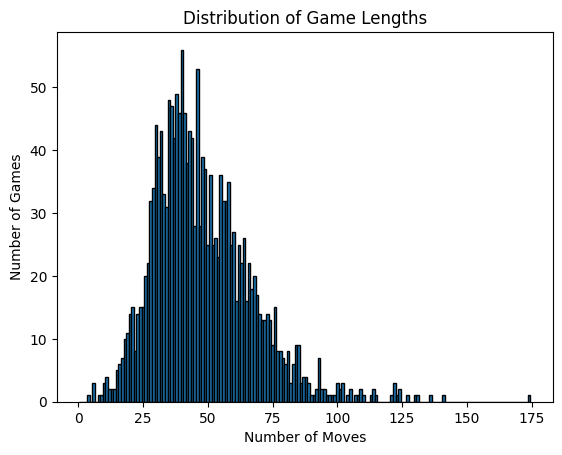

In [4]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
def read_csv(filename):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header
        games = [row[0] for row in reader]
    return games

# Extract the number of moves from each game
def get_moves_count(game):
    # Split the game string by spaces and divide by 2 (because every 2 strings represent a move for white and black)
    return len(game.split()) // 2

# Analyze the distribution of game lengths
def analyze_distribution(games):
    moves_counts = [get_moves_count(game) for game in games]
    
    # Use pandas for statistical analysis
    series = pd.Series(moves_counts)
    print(series.describe())

    # Plot the distribution
    plt.hist(moves_counts, bins=range(1, series.max() + 2), align='left', edgecolor='black')
    plt.xlabel('Number of Moves')
    plt.ylabel('Number of Games')
    plt.title('Distribution of Game Lengths')
    plt.show()

if __name__ == "__main__":
    games = read_csv('games.csv')
    analyze_distribution(games)


In [9]:
import pandas as pd

# Load the games.csv file
df = pd.read_csv('games.csv')

# Create new_games.csv
df['prompt'] = '[White "Magnus Carlsen"]\n[Black "Stockfish"]'
df.at[0, 'prompt'] = '[White "Stockfish"]\n[Black "Stockfish"]'
new_df = df[['prompt', 'completion']]  # Reorder the columns
new_df.to_csv('new_games.csv', index=False)

# Create new_games_10.csv
new_df_10 = new_df.sample(frac=0.05, random_state=42)  # Sample 10% of the rows
new_df_10.at[new_df_10.index[0], 'prompt'] = '[White "Stockfish"]\n[Black "Stockfish"]'
new_df_10.to_csv('new_games_05.csv', index=False)

# Create new_games_100.csv
new_df_100 = new_df.sample(frac=0.01, random_state=42)  # Sample 1% of the rows
new_df_100.at[new_df_100.index[0], 'prompt'] = '[White "Stockfish"]\n[Black "Stockfish"]'
new_df_100.to_csv('new_games_100.csv', index=False)


In [ ]:
import csv
import json

# Open the CSV file and read it
with open('new_games.csv', 'r', newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)

    # Open the JSONL file to write the converted data
    with open('output_file.jsonl', 'w', encoding='utf-8') as jsonlfile:
        for row in reader:
            # Extract prompt and completion from each row
            prompt = row['prompt']
            completion = row['completion']

            # Create a new dictionary with keys instruction and output
            new_dict = {
                "instruction": prompt,
                "output": completion
            }

            # Write the new dictionary to the JSONL file as a JSON string
            jsonlfile.write(json.dumps(new_dict) + '\n')

print("Conversion complete!")
